In [1]:
import numpy as np

In [2]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

np.random.seed(42)

Using Numpy backend.


In [3]:
def lorenz():
    """Lorenz system."""
    rho = 28.0
    sigma = 10.0
    beta = 8.0 / 3.0
    
    def f(state, t):
        x, y, z = state  # Unpack the state vector
        return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives
    return f

In [4]:
x0 = np.array([1.0, 1.0, 1.01]) # małe zaburzenie w Z(t0)
t = np.arange(0.0, 30.0, 0.01)

states = odeint(lorenz(), x0, t)

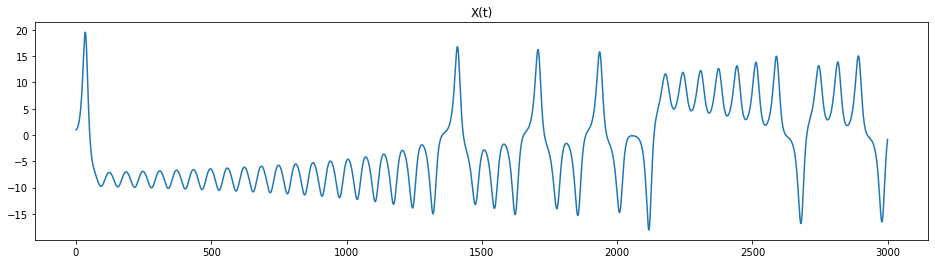

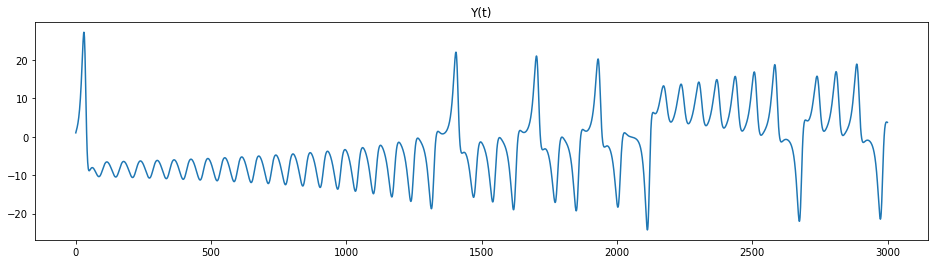

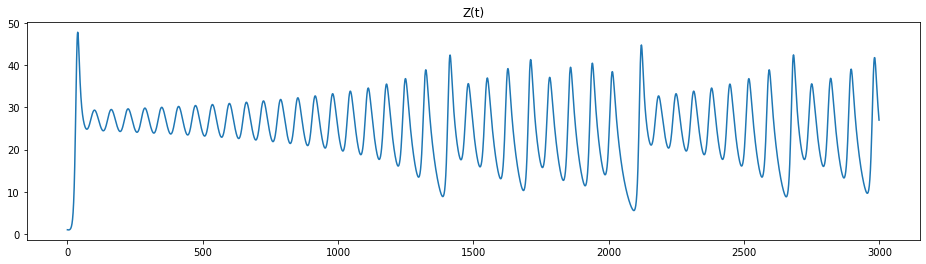

In [5]:
for i, title in [(0, 'X(t)'), (1, 'Y(t)'), (2, 'Z(t)')]:
    fig = plt.figure(figsize=(16,4))
    ax = fig.gca()
    ax.set_title(title)
    ax.plot(states[:, i])
    plt.show()

In [6]:
inputLength = len(states)
trainingLength = int(inputLength*0.5)

inputData = states[:, 0]
outputData = states

inputDataTraining = inputData[:trainingLength]
inputDataValidation = inputData[trainingLength:]

outputDataTraining = outputData[:trainingLength, :]
outputDataValidation = outputData[trainingLength:, :]

In [7]:
esn = PredictionESN(n_input=1, n_output=3, n_reservoir=50, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [8]:
esn.fit(inputDataTraining, outputDataTraining, transientTime="Auto", verbose=1)

100% (1443 of 1443) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.14540494575266347

In [9]:
one_step_prediction = esn.predict(inputDataValidation)

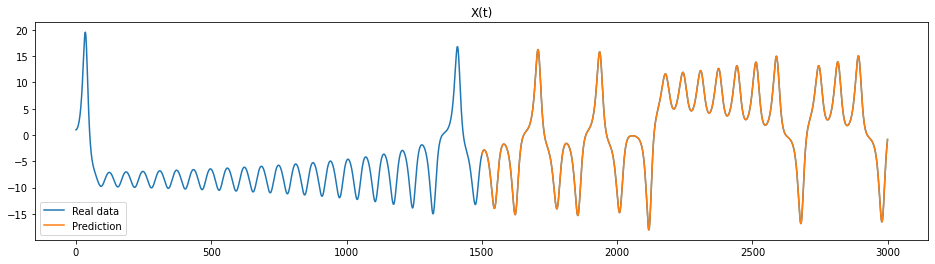

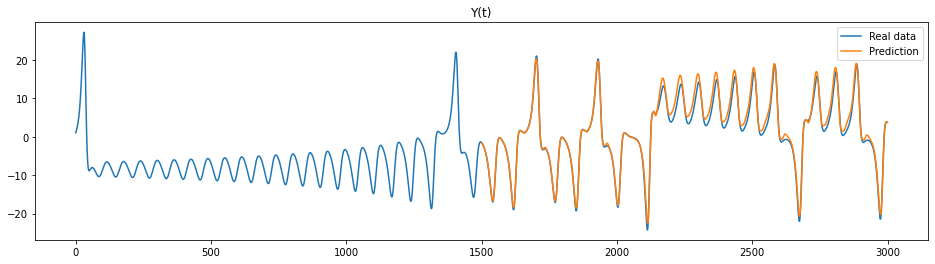

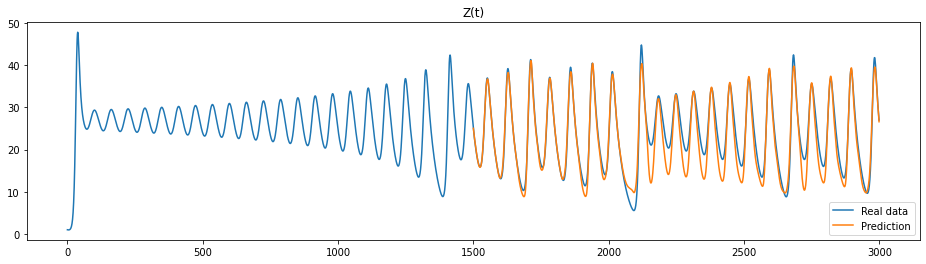

In [10]:
for i, title in [(0, 'X(t)'), (1, 'Y(t)'), (2, 'Z(t)')]:
    fig = plt.figure(figsize=(16,4))
    ax = fig.gca()
    ax.set_title(title)
    ax.plot(range(inputLength), outputData[:, i], label='Real data')
    ax.plot(range(trainingLength, inputLength), one_step_prediction.T[i], label='Prediction')
    ax.legend()
    plt.show()